In [934]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [935]:
f4 = pd.read_csv("C:/Users/samba/OneDrive/Desktop/TAMU CORPUS/Driscoll/sarima/datasets/EXG_2021.csv")

In [936]:
f4

,Date,EXG
0,3/26/2021,-0.009000
1,3/27/2021,-0.008233
2,3/28/2021,-0.007467
3,3/29/2021,-0.006700
4,3/30/2021,-0.005933
...,...,...
111,7/15/2021,0.223200
112,7/16/2021,0.222400
113,7/17/2021,0.221600
114,7/18/2021,0.220800


In [937]:
f4['Date'] = pd.to_datetime(f4['Date'])

In [938]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.api import ExponentialSmoothing

In [939]:
f4

,Date,EXG
0,2021-03-26,-0.009000
1,2021-03-27,-0.008233
2,2021-03-28,-0.007467
3,2021-03-29,-0.006700
4,2021-03-30,-0.005933
...,...,...
111,2021-07-15,0.223200
112,2021-07-16,0.222400
113,2021-07-17,0.221600
114,2021-07-18,0.220800


In [940]:
data2 = f4[0:28].copy()

In [941]:
data2['Date'] = pd.to_datetime(data2['Date'])
data2.index = data2['Date']

In [942]:
data2.drop(['Date'], axis = 1,inplace = True)

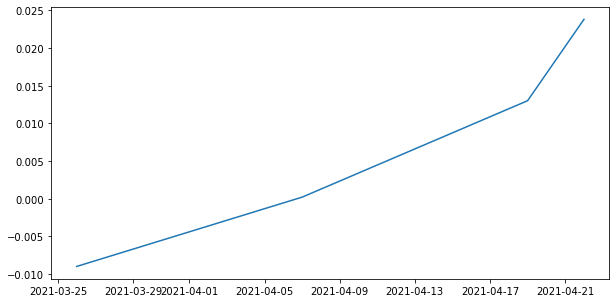

In [943]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,5
plt.plot(data2['EXG'])

In [944]:
ad_fuller_result = adfuller(data2['EXG'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: 2.0513411159930803
p-value: 0.9987360609104285


In [656]:
# Diff by 1 value
data2['EXG_log_1'] = data2['EXG'].diff()

In [945]:
# Diff by 2 value
data2['EXG_log_1'] = data2['EXG'].diff().diff()

In [458]:
# Diff by 2 values (log)
data2['EXG_log'] = np.log(data2['EXG'])
data2['EXG_log_1'] = data2['EXG_log'].diff().diff()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [793]:
# Diff by 1 value (log)
data2['EXG_log'] = np.log(data2['EXG'])
data2['EXG_log_1'] = np.log(data2['EXG_log']).diff()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [842]:
# Log and take difference of log
data2['EXG_log'] = np.log(data2['EXG'])
data2['EXG_log_1'] = data2['EXG_log'] - data2['EXG_log'].diff()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [946]:
ad_fuller_result = adfuller(data2['EXG_log_1'].dropna())
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -5.05156025054647
p-value: 1.7528748204067904e-05


In [947]:
data2 = data2.dropna()

In [948]:
data2

,EXG,EXG_log_1
Date,,
2021-03-28,-0.007467,-1.000000e-09
2021-03-29,-0.006700,1.000000e-09
2021-03-30,-0.005933,8.673617e-19
2021-03-31,-0.005167,-1.000000e-09
2021-04-01,-0.004400,1.000000e-09
2021-04-02,-0.003633,8.673617e-19
2021-04-03,-0.002867,-1.000000e-09
2021-04-04,-0.002100,1.000000e-09
2021-04-05,-0.001333,0.000000e+00


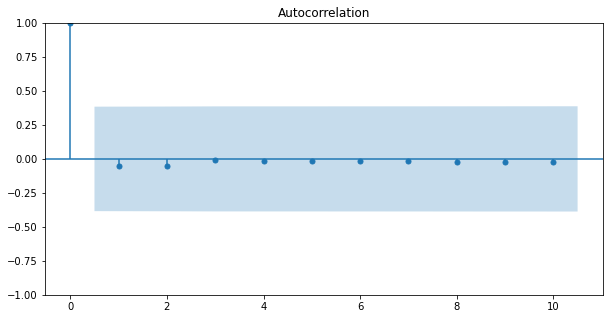

In [949]:
sm.graphics.tsa.plot_acf(data2['EXG_log_1'].values.squeeze(), lags=10)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


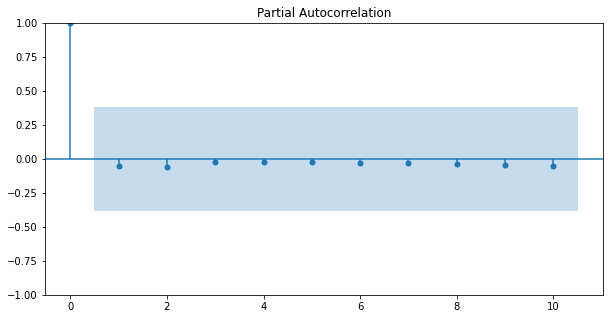

In [950]:
sm.graphics.tsa.plot_pacf(data2['EXG_log_1'].values.squeeze(), lags=10)
plt.show()

In [109]:
# p can be 1
# q value can be 0

In [951]:
train_data_1 = data2['EXG']
train_data_1

Date
2021-03-28   -0.007467
2021-03-29   -0.006700
2021-03-30   -0.005933
2021-03-31   -0.005167
2021-04-01   -0.004400
2021-04-02   -0.003633
2021-04-03   -0.002867
2021-04-04   -0.002100
2021-04-05   -0.001333
2021-04-06   -0.000567
2021-04-07    0.000200
2021-04-08    0.001267
2021-04-09    0.002333
2021-04-10    0.003400
2021-04-11    0.004467
2021-04-12    0.005533
2021-04-13    0.006600
2021-04-14    0.007667
2021-04-15    0.008733
2021-04-16    0.009800
2021-04-17    0.010867
2021-04-18    0.011933
2021-04-19    0.013000
2021-04-20    0.016600
2021-04-21    0.020200
2021-04-22    0.023800
Name: EXG, dtype: float64

In [952]:
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data_1, order = (0,2,0))
model_fit = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [953]:
print (model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    EXG   No. Observations:                   26
Model:                 ARIMA(0, 2, 0)   Log Likelihood                 147.391
Date:                Tue, 16 Aug 2022   AIC                           -292.782
Time:                        13:25:38   BIC                           -291.604
Sample:                    03-28-2021   HQIC                          -292.469
                         - 04-22-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.673e-07   2.27e-08     11.766      0.000    2.23e-07    3.12e-07
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               420.49
Prob(Q):                              0.77   Pr

<AxesSubplot:xlabel='Date'>

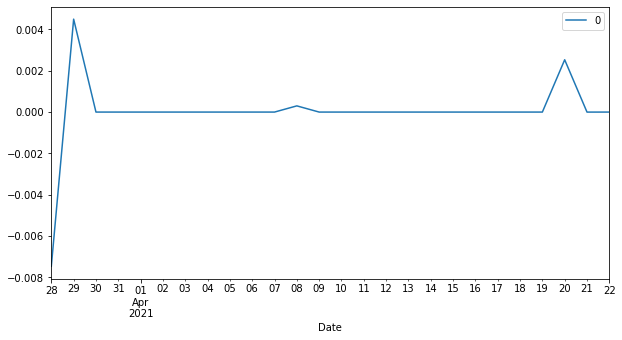

In [954]:
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
residuals.plot()

<AxesSubplot:ylabel='Density'>

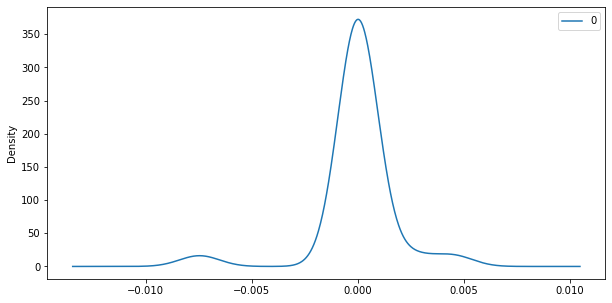

In [955]:
residuals.plot(kind='kde')

In [956]:
residuals.describe()

,0
count,2.600000e+01
mean,-5.176257e-06
std,1.816681e-03
min,-7.466667e-03
25%,-9.999998e-10
50%,-4.412811e-13
75%,1.000441e-09
max,4.500001e-03


In [957]:
model_pred = model_fit.forecast(steps = 88)

In [958]:
model_pred

2021-04-23    0.0274
2021-04-24    0.0310
2021-04-25    0.0346
2021-04-26    0.0382
2021-04-27    0.0418
               ...  
2021-07-15    0.3262
2021-07-16    0.3298
2021-07-17    0.3334
2021-07-18    0.3370
2021-07-19    0.3406
Freq: D, Name: predicted_mean, Length: 88, dtype: float64

In [715]:
model_pred_1 = np.exp(model_pred)

In [716]:
model_pred_1

2021-05-21    0.203937
2021-05-22    0.215810
2021-05-23    0.228203
2021-05-24    0.241131
2021-05-25    0.254606
2021-05-26    0.268641
2021-05-27    0.283250
2021-05-28    0.298444
2021-05-29    0.314236
2021-05-30    0.330640
2021-05-31    0.347666
2021-06-01    0.365327
2021-06-02    0.383634
2021-06-03    0.402598
2021-06-04    0.422232
2021-06-05    0.442545
2021-06-06    0.463547
2021-06-07    0.485250
2021-06-08    0.507662
2021-06-09    0.530793
2021-06-10    0.554652
2021-06-11    0.579247
2021-06-12    0.604587
2021-06-13    0.630679
2021-06-14    0.657530
2021-06-15    0.685148
2021-06-16    0.713539
2021-06-17    0.742708
2021-06-18    0.772660
2021-06-19    0.803402
2021-06-20    0.834937
2021-06-21    0.867269
2021-06-22    0.900402
2021-06-23    0.934339
2021-06-24    0.969081
2021-06-25    1.004632
2021-06-26    1.040991
2021-06-27    1.078161
2021-06-28    1.116142
2021-06-29    1.154933
2021-06-30    1.194533
2021-07-01    1.234942
2021-07-02    1.276158
2021-07-03 

In [930]:
test_data = f4['EXG'].iloc[98:116]

In [931]:
test_data

98     0.220571
99     0.220857
100    0.221143
101    0.221429
102    0.221714
103    0.222000
104    0.222286
105    0.222571
106    0.222857
107    0.223143
108    0.223429
109    0.223714
110    0.224000
111    0.223200
112    0.222400
113    0.221600
114    0.220800
115    0.220000
Name: EXG, dtype: float64

In [959]:
model_pred.to_csv('28_day_2021_EXG.csv')

In [933]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test_data, model_pred))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.002
